In [130]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Загружаем все собранные данные воедино

In [10]:
files = !ls *.csv
files

['magnit_clean.csv',
 'metro_clean.csv',
 'okey_clean.csv',
 'perekrestok_clean.csv',
 'peterochka_clean.csv',
 'utkonos_clean.csv']

In [12]:
result = pd.DataFrame(columns=['Название', 'Категория', 'Бренд', 'Вес', 'Продукт'])
for file in files:
    result = pd.concat([result, pd.read_csv(file)])
    
print(result.shape)
result.head()

(107206, 5)


,Название,Категория,Бренд,Вес,Продукт
0,"LE PETIT MARSEILLAIS® Гель-шампунь, Апельсинов...","Красота, гигиена, бытовая химия",le petit marseillais,NaN,гель
1,Pantene Pro-V Бальзам Aqua Light/ Густые и кре...,"Красота, гигиена, бытовая химия",pantene pro - v,360,бальзам
2,"АКВАФРЕШ, Паста зубная, мои большие зубки, 50 ...",Другое,oral b,50,паста зубная
3,"Антиперспирант ДЕОНИКА Саммер Парадайз, женски...","Красота, гигиена, бытовая химия",деоника,150,антиперспирант
4,"Антиперспирант спрей AXE®, Ледокол, 150 мл","Красота, гигиена, бытовая химия",axe,150,антиперспирант


## Удаляем дубликаты в названиях продкутов

In [16]:
print(result.shape[0] - result.drop_duplicates(subset=['Название']).shape[0])
result = result.drop_duplicates(subset=['Название'])

965


## Смотрим какие есть пустые значения

In [23]:
result.isna().sum()

Название         0
Категория        0
Бренд         4290
Вес          21622
Продукт          0
dtype: int64

In [24]:
result = result.dropna(subset=['Бренд'])

## Работаем с продуктами

In [50]:
result['Продукт'] = result['Продукт'].str.lower()  # приводим всё к нижнему регистру

In [51]:
len(result['Продукт'].unique())  # Количество уникальных продуктов

9311

In [52]:
result['Продукт'].value_counts()

сыр                  1411
напиток              1327
колбаса              1234
вино                 1218
пюре                 1180
                     ... 
игра развивающая        1
пластик                 1
свинина духовая         1
стимулятор              1
креветка cеверная       1
Name: Продукт, Length: 9311, dtype: int64

In [68]:
# Удаляем редкие товары, скорее всего, они нам нерелевантны или же это повторы
result = result.groupby('Продукт').filter(lambda x: len(x) > 13)

In [69]:
# Ещё раз посмотрим на количество уникальных продуктов
len(result['Продукт'].unique()) 

960

Получилось сократить количнество товаров в 10 раз! Это значительно упрощает нам задачу

## Пройдёмся по брендам

In [71]:
len(result['Бренд'].unique()) # Брендов в разы больше, чем уникальных товаров - не очень хорошо

7424

In [73]:
result['Бренд'] = result['Бренд'].str.lower()  # приводим всё к нижнему регистру
len(result['Бренд'].unique())

6784

In [74]:
result['Бренд'].value_counts()

фрутоняня       654
о'кей           476
fine life       464
nivea           461
aro             409
               ... 
марти             1
apacer            1
патриарш          1
stella aurea      1
капелька          1
Name: Бренд, Length: 6784, dtype: int64

In [97]:
# Удалим самые редкие товары:
result = result.groupby('Бренд').filter(lambda x: len(x) > 5)
result.sample(5)

,Название,Категория,Бренд,Вес,Продукт
8639,Смесь овощная Vитамин Испанская в соусе Ривейр...,Замороженные продукты,vитамин,400 г,смесь овощная
14331,Корм для кошек Sheba Pleasure c форелью и крев...,Зоотовары,sheba,NaN,корм для кошек
139,"Сливочное масло Вологодское 82,5 % 180 г бзмж","Молоко, сыр, яйца",вологодское,180 г,сливочное масло
17571,"Йогурт Чудо со вкусом Ананас-Банан 2,4%, 270г","Молоко, сыр, яйца",чудо,0.27 кг,йогурт
37599,"Вода Нарзан минеральная лечебно-столовая 0,45л","Воды, соки, напитки",нарзан,0.69 кг,вода


In [98]:
# Ещё раз посмотрим на количество уникальных брендов
len(result['Бренд'].unique())

2409

In [100]:
len(result['Продукт'].unique()) # Количество ункальных продуктов от этого не пострадало :)

960

In [102]:
len(result) # Общий размер датасета уменьшился со 107 тысяч до 72. Неплохо

71926

## А теперь категории:

In [110]:
result['Категория'].unique() # как видно, некоторые одинаковые категории не стоят вместе, нужно исправить

array(['Красота, гигиена, бытовая химия', 'Хлеб, сладости, снеки',
       'Молоко, сыр, яйца', 'Соусы, орехи, консервы',
       'Макароны, крупы, специи', 'Другое', 'Воды, соки, напитки',
       'Рыба, икра', 'Чай, кофе, сахар', 'Замороженные продукты',
       'Товары для мам и детей', 'Птица, мясо, деликатесы', 'Посуда',
       'Овощи, фрукты, ягоды', 'Товары для дома и дачи',
       'Подборки и готовые блюда', 'Зоотовары', 'Бытовая техника',
       'Бытовая химия', 'Дача и гриль', 'Алкоголь', 'Постные продукты',
       'Дом, сад, кухня, авто', 'Рыба, икра, морепродукты',
       'Овощи, фрукты, грибы, ягоды', 'Здоровый выбор', 'Скидки месяца',
       'Системы нагревания и электронные сигареты',
       'Соусы, орехи, консервы.', 'Бытовая химия.',
       'Замороженные продукты.', 'Птица, мясо, деликатесы.',
       'Хлеб, сладости, снеки.', 'Чай, кофе, сахар.', 'Зоотовары.',
       'Товары для мам и детей.', 'Скидки месяца.', 'Рыба, икра.',
       'Воды, соки, напитки.', 'Подборки и гото

In [112]:
result['Категория'] = result['Категория'].str.replace('.', '') # удаляем точку

In [121]:
def replace_category(category: str) -> str:
    if category == 'Бытовая химия':
        return 'Красота, гигиена, бытовая химия'
    if category == 'Дом, сад, кухня, авто':
        return 'Товары для дома и дачи'
    if category == 'Овощи, фрукты, грибы, ягоды':
        return 'Овощи, фрукты, ягоды'
    if category == 'Системы нагревания и электронные сигареты':
        return 'Другое'
    if category == 'Рыба, икра, морепродукты':
        return 'Рыба, икра'
    if category in ['Здоровый выбор', 'Скидки месяца']:
        return None
    return category

In [128]:
result['Категория'] = result['Категория'].apply(replace_category)
result = result.dropna(subset=['Категория'])
result['Категория'].unique()

array(['Красота, гигиена, бытовая химия', 'Хлеб, сладости, снеки',
       'Молоко, сыр, яйца', 'Соусы, орехи, консервы',
       'Макароны, крупы, специи', 'Другое', 'Воды, соки, напитки',
       'Рыба, икра', 'Чай, кофе, сахар', 'Замороженные продукты',
       'Товары для мам и детей', 'Птица, мясо, деликатесы', 'Посуда',
       'Овощи, фрукты, ягоды', 'Товары для дома и дачи',
       'Подборки и готовые блюда', 'Зоотовары', 'Бытовая техника',
       'Дача и гриль', 'Алкоголь', 'Постные продукты'], dtype=object)

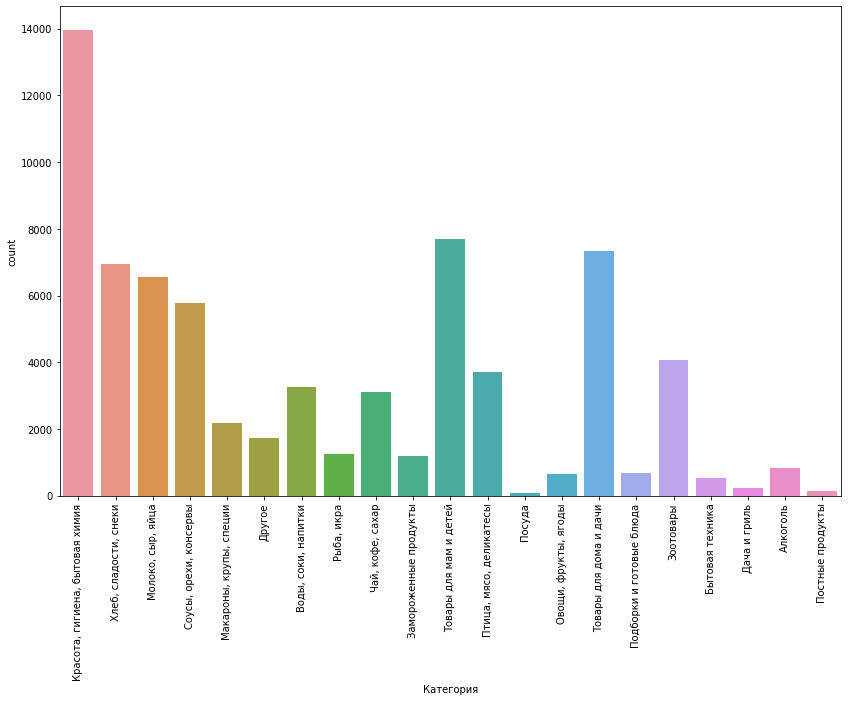

In [141]:
plt.figure(figsize=(14, 9))
sns.countplot(result['Категория'])
plt.xticks(rotation=90)
plt.show()

## И под конец пройдёмся по названиям продукта

In [153]:
result.head()

,Название,Категория,Бренд,Вес,Продукт
0,"LE PETIT MARSEILLAIS® Гель-шампунь, Апельсинов...","Красота, гигиена, бытовая химия",le petit marseillais,NaN,гель
4,"Антиперспирант спрей AXE®, Ледокол, 150 мл","Красота, гигиена, бытовая химия",axe,150,антиперспирант
5,"Антиперспирант- спрей DOVE®, Нежность лепестко...","Красота, гигиена, бытовая химия",dove,NaN,антиперспирант
7,"Бальзам для волос SCHAUMA®, Детоксматча, 200 мл","Красота, гигиена, бытовая химия",schauma,200,бальзам для волос
8,Бальзам-ополаскиватель Пантин Интенсивное восс...,"Красота, гигиена, бытовая химия",pantene,NaN,бальзам


In [160]:
len_before = len(result)
result['Название'] = result['Название'].str.replace('®', '')
result['Название'] = result['Название'].str.lower()
result = result.drop_duplicates(subset=['Название'])
len_after = len(result)
print(len_before - len_after)

259


In [161]:
result.shape

(71638, 5)

In [162]:
result.head()

,Название,Категория,Бренд,Вес,Продукт
0,"le petit marseillais гель-шампунь, апельсиново...","Красота, гигиена, бытовая химия",le petit marseillais,NaN,гель
4,"антиперспирант спрей axe, ледокол, 150 мл","Красота, гигиена, бытовая химия",axe,150,антиперспирант
5,"антиперспирант- спрей dove, нежность лепестков...","Красота, гигиена, бытовая химия",dove,NaN,антиперспирант
7,"бальзам для волос schauma, детоксматча, 200 мл","Красота, гигиена, бытовая химия",schauma,200,бальзам для волос
8,бальзам-ополаскиватель пантин интенсивное восс...,"Красота, гигиена, бытовая химия",pantene,NaN,бальзам
